In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf
import datetime
import time

In [3]:
tb_logdir = 'tb_logdir/'+str(datetime.date.today())+str(time.time())

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


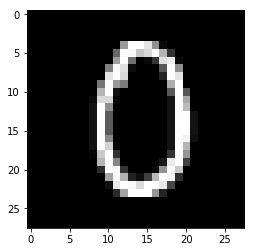

In [9]:
    %matplotlib inline
    import matplotlib.pyplot as plt 
    batch_xs, batch_ys = mnist.train.next_batch(1)
    X = batch_xs
    X = X.reshape([28,28])
    plt.gray()
    print (batch_ys)
    plt.imshow(X)

In [10]:
x = tf.placeholder(tf.float32, [None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

tf.summary.histogram('W',W)
tf.summary.histogram('b',b)
tf.summary.histogram('y',y)

<tf.Tensor 'y:0' shape=() dtype=string>

In [11]:
y_ = tf.placeholder(tf.float32, [None,10])

In [12]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [13]:
tf.summary.scalar('loss',cross_entropy)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [19]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
tf.summary.scalar('accuracy',accuracy)

<tf.Tensor 'accuracy_3:0' shape=() dtype=string>

In [18]:
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter(tb_logdir , sess.graph)
    tf.global_variables_initializer().run()
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        _, summary =sess.run([train_step,tf.summary.merge_all()], feed_dict={x: batch_xs, y_: batch_ys})
        summary_writer.add_summary(summary, i)
        sess.run([accuracy,tf.summary.merge_all()], feed_dict={x: batch_xs, y_: batch_ys})